In [1]:
import numpy as np
import os
import pandas as pd
import sys

# Config

In [2]:
HYPER_OPT = True 
HYPER_OPT_TIME = 3*60
USE_ORIGINAL_DATA = False 
SUBMIT_TO_KAGGLE = False

In [3]:
# Define the base directory (where the notebook is running)
base_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Define the data directory
data_dir = os.path.join(base_dir, "data")

model_dir = os.path.join(base_dir, "models")

sys.path.append(base_dir)

# Data Extraction

In [4]:
from axyom_utilities.data_extraction import extract_data

X_train, y_train, X_test, X_orig, y_orig = extract_data(data_dir, USE_ORIGINAL_DATA)

# Data Cleaning

In [5]:
from axyom_utilities.preprocessing import preprocess 

X_train = preprocess(X_train)
X_test = preprocess(X_test)
if USE_ORIGINAL_DATA:
    X_orig = preprocess(X_orig)

# HyperOpt

[I 2024-12-18 05:35:52,983] Using an existing study with name 'lgbm' instead of creating a new one.


Training fold 1...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[428]	valid_0's l2: 1.10308
Fold 1 RMSE: 1.0503
Training fold 2...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[461]	valid_0's l2: 1.10125
Fold 2 RMSE: 1.0494
Training fold 3...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[335]	valid_0's l2: 1.09777
Fold 3 RMSE: 1.0477
Training fold 4...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[519]	valid_0's l2: 1.10356
Fold 4 RMSE: 1.0505
Training fold 5...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[428]	valid_0's l2: 1.10059


[I 2024-12-18 05:38:14,629] Trial 3 finished with value: 1.0494043625706133 and parameters: {'learning_rate': 0.05433350003437882, 'max_depth': 14, 'num_leaves': 210, 'min_child_samples': 74, 'min_child_weight': 29.571435175175054, 'feature_fraction': 0.4076219182208606, 'bagging_fraction': 0.648152619271914, 'bagging_freq': 1, 'lambda_l1': 0.0025102342177886665, 'lambda_l2': 0.1077122810294101}. Best is trial 2 with value: 1.0459451141342708.


Fold 5 RMSE: 1.0491
Mean CV RMSE: 1.0494 ± 0.0010
Training fold 1...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2303]	valid_0's l2: 1.09623
Fold 1 RMSE: 1.0470
Training fold 2...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2814]	valid_0's l2: 1.09379
Fold 2 RMSE: 1.0458
Training fold 3...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3445]	valid_0's l2: 1.09031
Fold 3 RMSE: 1.0442
Training fold 4...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2869]	valid_0's l2: 1.09622
Fold 4 RMSE: 1.0470
Training fold 5...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3115]	valid_0's l2: 1.09345


[I 2024-12-18 05:52:59,391] Trial 4 finished with value: 1.0459434587937824 and parameters: {'learning_rate': 0.003133555823067838, 'max_depth': 13, 'num_leaves': 74, 'min_child_samples': 72, 'min_child_weight': 0.023870970380862246, 'feature_fraction': 0.8646876725611532, 'bagging_fraction': 0.40306530325827994, 'bagging_freq': 1, 'lambda_l1': 0.0027785274261174398, 'lambda_l2': 0.00978752568525981}. Best is trial 4 with value: 1.0459434587937824.


Fold 5 RMSE: 1.0457
Mean CV RMSE: 1.0459 ± 0.0010
Best Trial:  {'learning_rate': 0.003133555823067838, 'max_depth': 13, 'num_leaves': 74, 'min_child_samples': 72, 'min_child_weight': 0.023870970380862246, 'feature_fraction': 0.8646876725611532, 'bagging_fraction': 0.40306530325827994, 'bagging_freq': 1, 'lambda_l1': 0.0027785274261174398, 'lambda_l2': 0.00978752568525981}
Best Score:  1.0459434587937824


c:\Users\Axyom\Kaggle\PG S4e12 - Regression Insurance\axyom_utilities\hyperparameter_tuning.py:64: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


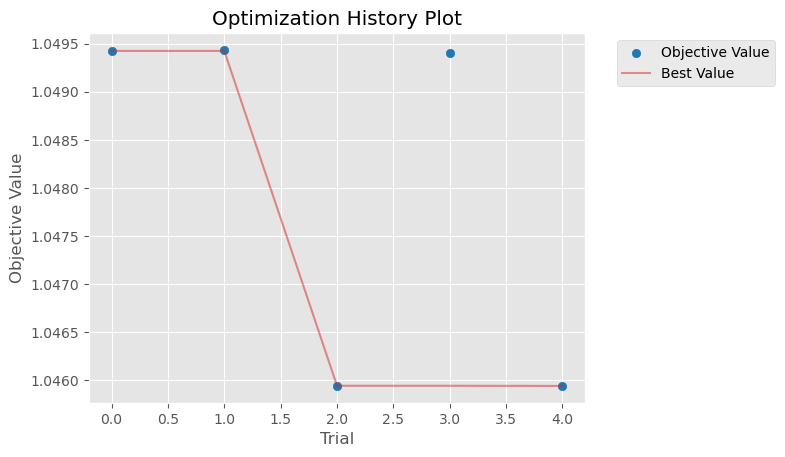

c:\Users\Axyom\Kaggle\PG S4e12 - Regression Insurance\axyom_utilities\hyperparameter_tuning.py:67: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


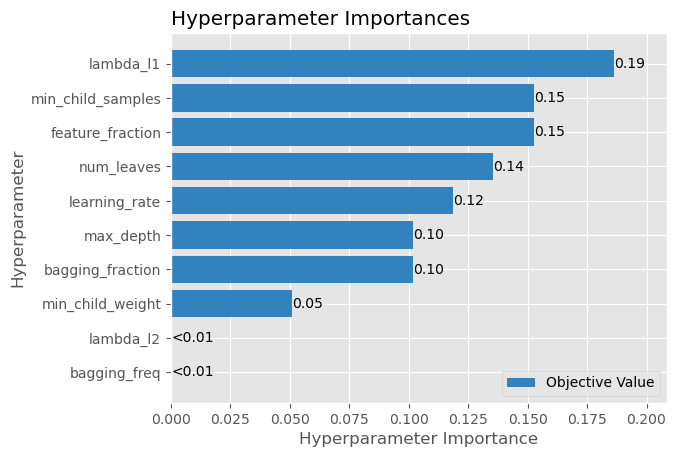

c:\Users\Axyom\Kaggle\PG S4e12 - Regression Insurance\axyom_utilities\hyperparameter_tuning.py:70: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  plot_slice(study)
c:\Users\Axyom\anaconda3\envs\kaggle_env\lib\site-packages\optuna\visualization\matplotlib\_slice.py:141: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim[0], xlim[1])


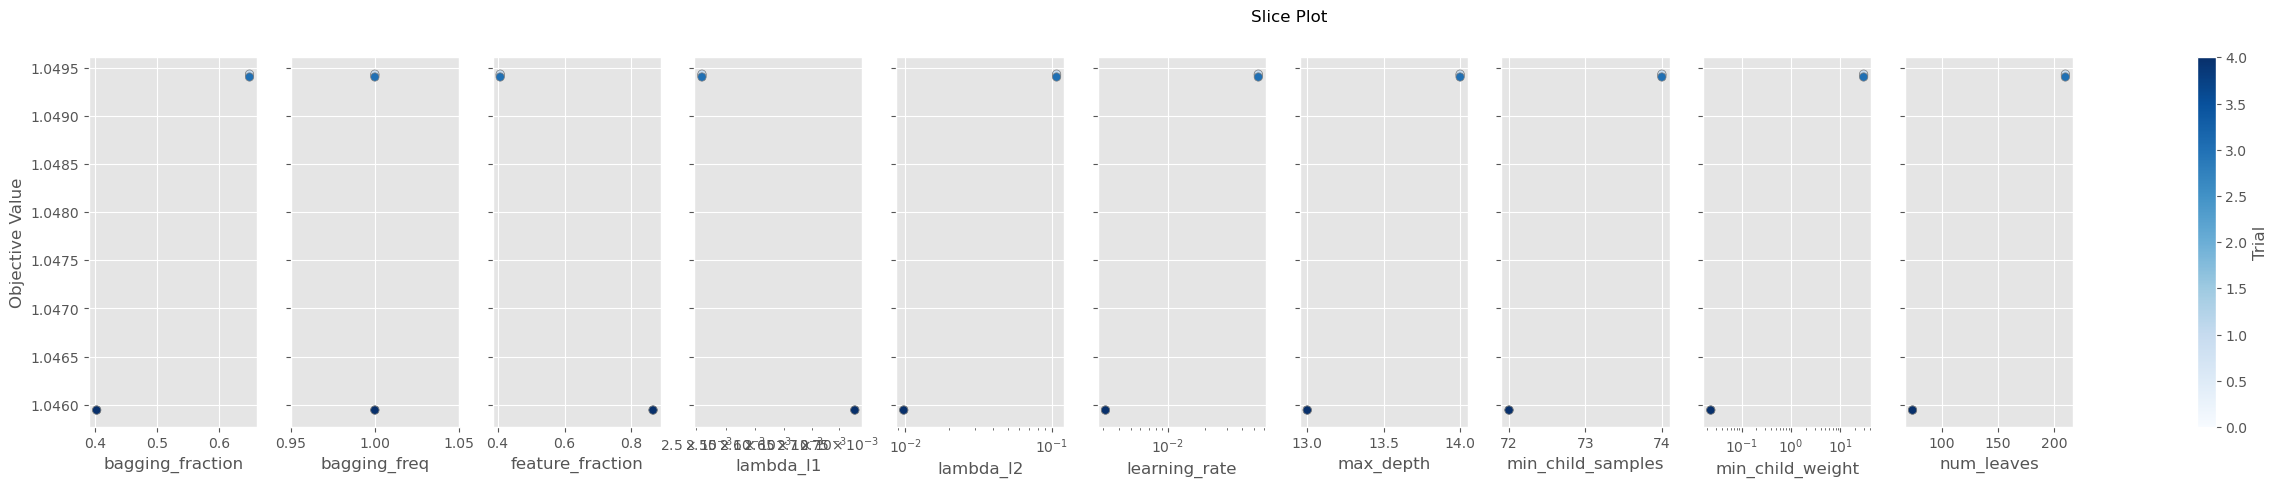

In [6]:
from axyom_utilities.hyperparameter_tuning import LGBMTuner

if HYPER_OPT:
    #tune_lgbm(X_train, y_train, HYPER_OPT_TIME)
    lgbm_tuner = LGBMTuner(X_train, y_train, HYPER_OPT_TIME)
    best_params = lgbm_tuner.tune()
else:
    best_params = {
        'n_estimators': 1179,
        'objective': 'regression',
        "metric": "rmse",  # Use RMSE as the evaluation metric
        'device': 'gpu',
        'verbose': -1,
        'learning_rate': 0.0060716555029467975,
        'max_depth': 10,
        'num_leaves': 103,
        'min_child_samples': 16,
        'min_child_weight': 0.0012165489316105147,
        'feature_fraction': 0.9266241230252082,
        'bagging_fraction': 0.9038497361834028,
        'bagging_freq': 2,
        'lambda_l1': 0.07784436949246655,
        'lambda_l2': 8.807120942617468
    }

In [7]:
best_params

{'n_estimators': 2909,
 'objective': 'regression',
 'device': 'gpu',
 'verbose': -1,
 'learning_rate': 0.003133555823067838,
 'max_depth': 13,
 'num_leaves': 74,
 'min_child_samples': 72,
 'min_child_weight': 0.023870970380862246,
 'feature_fraction': 0.8646876725611532,
 'bagging_fraction': 0.40306530325827994,
 'bagging_freq': 1,
 'lambda_l1': 0.0027785274261174398,
 'lambda_l2': 0.00978752568525981}

In [8]:
best_params["n_estimators"] = 10000

# Model Training

In [9]:
from axyom_utilities.training import train_model_cv
from axyom_utilities.wrappers import LGBMRegressorWrapper
import json

model = LGBMRegressorWrapper(**best_params)

# Use the train_model function to train and evaluate the model
results = train_model_cv(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    X_orig=X_orig,
    early_stopping_rounds=100,
    cv_splits=7
)

Training fold 1...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2932]	valid_0's l2: 1.10124
Fold 1 RMSE: 1.0494
Training fold 2...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2720]	valid_0's l2: 1.08701
Fold 2 RMSE: 1.0426
Training fold 3...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3103]	valid_0's l2: 1.09614
Fold 3 RMSE: 1.0470
Training fold 4...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3050]	valid_0's l2: 1.08781
Fold 4 RMSE: 1.0430
Training fold 5...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3083]	valid_0's l2: 1.09717
Fold 5 RMSE: 1.0475
Training fold 6...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3359]	valid_0's l2: 1.09891
Fold 6 RMSE: 1.0483
Training f

In [10]:
mean_score = np.mean(results["cv_scores"])
std_score = np.std(results["cv_scores"])

# Prepare the data
data = {
    "mean_score": mean_score,
    "std_score": std_score
}

# Save to a JSON file
with open("score.json", "w") as json_file:
    json.dump(data, json_file, indent=4)  # Use `indent` for readability

In [11]:
import joblib

# Save OOF predictions as a CSV file
oof_preds_df = pd.DataFrame({"oof_preds": results["oof_preds"]})
oof_preds_df.to_csv("oof_preds", index=False)
print("OOF predictions saved to oof_preds.csv.")

test_preds_df = pd.DataFrame({"test_preds": results["test_preds"]})
test_preds_df.to_csv("test_preds", index=False)
print("Test predictions saved to test_preds.csv.")

joblib.dump(results["models"], "models.pkl")

OOF predictions saved to oof_preds.csv.
Test predictions saved to test_preds.csv.


['models.pkl']

# Submission

In [12]:
y_pred = np.expm1(results['test_preds'])

submission = pd.DataFrame({
    'id': X_test.index,  
    'Premium Amount': y_pred
})

FILE_PATH = f"clean_LGBM_{mean_score:.4f}.csv"

submission.to_csv(FILE_PATH, index=False)

In [13]:
if False: 
    # Define your message and file paths
    COMP_NAME = "playground-series-s4e12"

    SUBMIT_MESSAGE = f"Clean LGBM: Mean score: {mean_score:.4f} +/- {std_score:.4f}"

    # Submit to Kaggle
    os.system(f'kaggle competitions submit -c {COMP_NAME} -f {FILE_PATH} -m "{SUBMIT_MESSAGE}"')